In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


bureau = "https://raw.githubusercontent.com/JY6299/CR_Modeling_2/refs/heads/main/bureau_data.csv"
loan = "https://raw.githubusercontent.com/JY6299/CR_Modeling_2/refs/heads/main/loans.csv"
cust = "https://raw.githubusercontent.com/JY6299/CR_Modeling_2/refs/heads/main/customers.csv"

bureau_data = pd.read_csv(bureau)
loan_data = pd.read_csv(loan)
cust_data = pd.read_csv(cust)

bureau_data.shape, loan_data.shape, cust_data.shape

((50000, 8), (50000, 15), (50000, 12))

In [ ]:
#By Looking at the Data Structure, First to design the Segmentation

In [43]:
bureau_data.info(), loan_data.info(), cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   cust_id                    50000 non-null  object
 1   number_of_open_accounts    50000 non-null  int64 
 2   number_of_closed_accounts  50000 non-null  int64 
 3   total_loan_months          50000 non-null  int64 
 4   delinquent_months          50000 non-null  int64 
 5   total_dpd                  50000 non-null  int64 
 6   enquiry_count              50000 non-null  int64 
 7   credit_utilization_ratio   50000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 3.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_id                      50000 non-null  object 
 1   cust

(None, None, None)

In [58]:
#Drop some features that are apparantly meaningless data.
cust_data.drop(columns=['zipcode','state','city'],inplace=True)


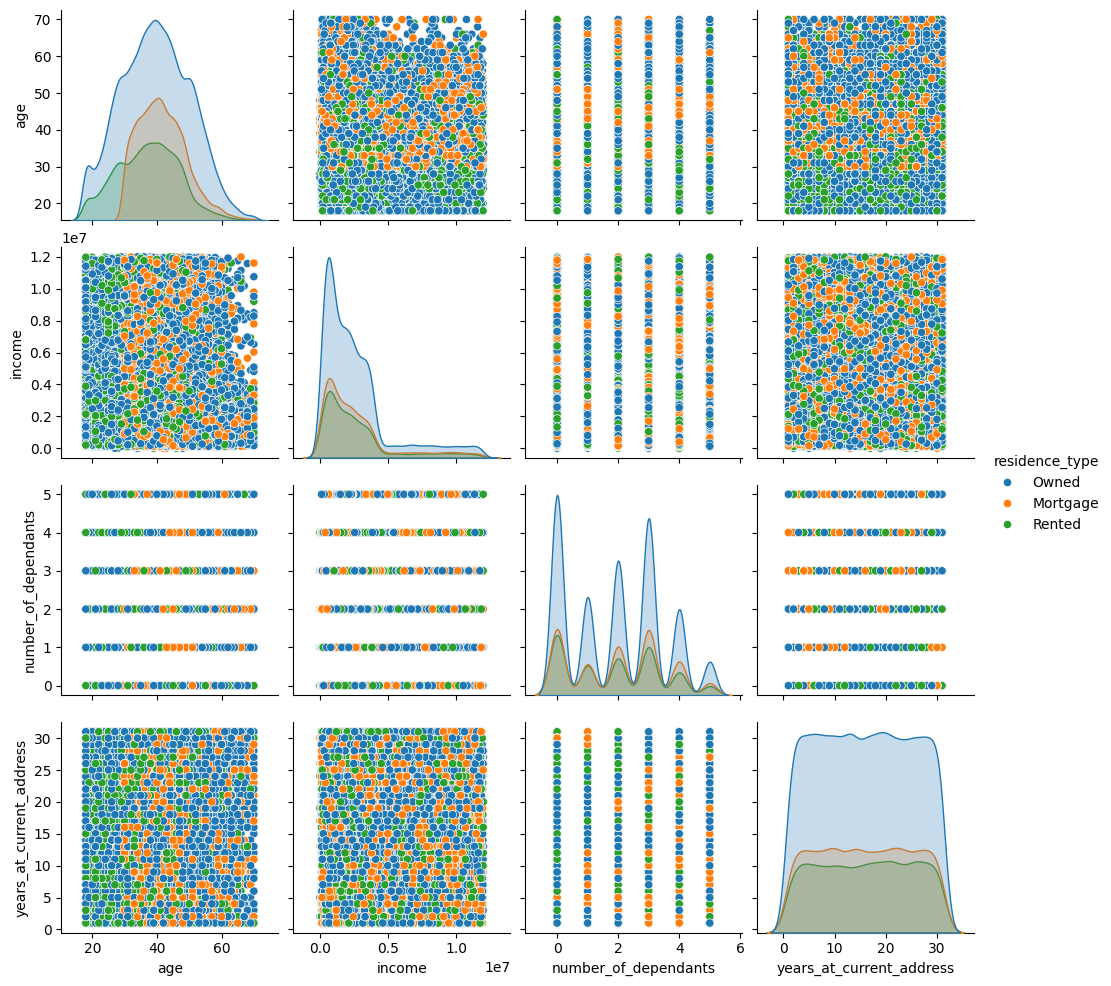

In [51]:
sns.pairplot(cust_data,hue='residence_type')

#theres a significant pattern in age: younger people are more likely to rent
#pattern in year_at_current_address: the longer year at current age, the more likely to be owner

In [59]:
# Since we see missing value in residence_type, we fillna by age.
cust_data['residence_type'].value_counts()

cust_data.loc[
    (cust_data['age']<40) & (cust_data['residence_type'].isnull()), 'residence_type'
] = 'rented'

cust_data.loc[
    (cust_data['age']>=40) & (cust_data['residence_type'].isnull()), 'residence_type'
] = 'ownd'


In [60]:
cust_data['residence_type'].value_counts()

,count
residence_type,
Owned,28238
Mortgage,11819
Rented,9881
rented,33
ownd,29


In [20]:
#Combine all datasets together based on acct level
df = pd.merge(cust_data,loan_data, how = 'left', on='cust_id')
df = pd.merge(df,bureau_data, how='left', on='cust_id')
df.shape


(50000, 33)

In [41]:
#Dealing Missing Value
df.isnull().sum() #residence_type has 62 NaN, check those accts characteristics
filtna = df['residence_type'].isnull()
Missing_acct = df.loc[filtna]
Missing_acct.head(5)


,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
86,C00087,49,M,Single,Self-Employed,4770000,0,NaN,22,Bangalore,...,2019-07-27,2019-08-08,False,3,2,107,7,34,3,75
1072,C01073,40,M,Married,Self-Employed,2068000,3,NaN,30,Bangalore,...,2019-09-01,2019-09-13,False,2,2,91,14,46,4,27
1084,C01085,43,M,Married,Self-Employed,6833000,4,NaN,30,Lucknow,...,2019-09-02,2019-09-18,False,1,0,10,0,0,5,95
3777,C03778,27,M,Single,Salaried,1398000,0,NaN,31,Jaipur,...,2019-12-09,2019-12-20,False,3,2,91,6,34,7,0
5915,C05916,31,M,Single,Salaried,2641000,0,NaN,16,Jaipur,...,2020-02-25,2020-03-17,False,1,0,53,21,137,4,54


,count
default,
False,61
True,1


,count
residence_type,
Owned,28238
Mortgage,11819
Rented,9881
NaN,62
